# Vamos ver como simular uma carteira aleatória de ações a partir de uma base de dados com tickers da b3:

In [1]:
#Bibliotecas Necessárias:
import pandas as pd
import numpy as np
import random
import yfinance as yf
import plotly.express as px

### Lendo os dados da planilha:

In [2]:
base_de_dados = pd.read_excel('indice_Amplo_Ibov.xlsx', sheet_name=0)
base_de_dados

,Ticker,Ação,Tipo,Qtde. Teórica,Part. (%),Setor,Sub_Setor
0,RRRP3,3R PETROLEUM,ON NM,129507288,0.185,Energy,Oil & Gas E&P
1,ABCB4,ABC BRASIL,PN N2,70580422,0.037,Financial Services,Banks—Regional
2,AERI3,AERIS,ON NM,218058827,0.068,Industrials,Specialty Industrial Machinery
3,AESB3,AES BRASIL,ON NM,149647285,0.078,Utilities,Utilities—Renewable
4,ALSO3,ALIANSCSONAE,ON ED NM,127376805,0.126,Real Estate,Real Estate Services
...,...,...,...,...,...,...,...
175,VIVA3,VIVARA S.A.,ON ED NM,93368726,0.087,Consumer Cyclical,Luxury Goods
176,VULC3,VULCABRAS,ON NM,74685291,0.022,Consumer Cyclical,Footwear & Accessories
177,WEGE3,WEG,ON NM,1482296002,1.753,Industrials,Specialty Industrial Machinery
178,WIZS3,WIZ S.A.,ON NM,77719799,0.031,Financial Services,Insurance Brokers


### Vamos selecionar a coluna dos tickers:

In [3]:
acoes = base_de_dados.filter(items=['Ticker'])
acoes = acoes + '.SA'
acoes

,Ticker
0,RRRP3.SA
1,ABCB4.SA
2,AERI3.SA
3,AESB3.SA
4,ALSO3.SA
...,...
175,VIVA3.SA
176,VULC3.SA
177,WEGE3.SA
178,WIZS3.SA


### vamos pegar o preço de fechamento dessas ações da coluna anterior:

In [4]:
#o yfinance apenas aceita strings ou listas nesse comando, então vamos converter o dataframe em uma lista:
lista_acoes = acoes['Ticker'].tolist()
dados_yahoo = yf.download(tickers=lista_acoes, period='1y')['Adj Close'] # -->aqui estamos pegando os dados de preço de fechamento ajustado do ultimo ano de todas as ações da lista anterior
print(dados_yahoo)

[*********************100%***********************]  180 of 180 completed
            AALR3.SA   ABCB4.SA   ABEV3.SA  AERI3.SA   AESB3.SA   AGRO3.SA  \
Date                                                                         
2020-05-11      8.66  11.491520  11.577252       NaN        NaN  20.041254   
2020-05-12      8.40  11.255069  11.363937       NaN        NaN  19.789528   
2020-05-13      8.39  11.349649  10.917912       NaN        NaN  19.460348   
2020-05-14      8.44  11.141572  11.383329       NaN        NaN  19.392576   
2020-05-15      8.70  11.056450  11.286368       NaN        NaN  19.808889   
...              ...        ...        ...       ...        ...        ...   
2021-05-05      9.13  14.800000  14.860000      8.30  14.437153  36.130001   
2021-05-06      8.91  14.830000  16.180000      8.60  14.526089  35.169998   
2021-05-07      8.93  14.800000  16.209999      8.79  14.476680  34.900002   
2021-05-10      9.03  14.820000  16.500000      8.49  14.229638  34.0

### agora vamos tratar os dados da coluna da seguinte forma:
#### 1) vamos retirar os dados sem resultados ou em branco:
#### 2) vamos criar uma tabela de retorno que tenha a variação em % de todas as ações
#### 3) selecionar as ações aleatórias:

In [5]:
# fazendo a 1) parte:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=246)
dados_yahoo.drop(columns=['BPAN4.SA'], inplace=True)
print(dados_yahoo)

            AALR3.SA   ABCB4.SA   ABEV3.SA   AGRO3.SA   ALPA4.SA   ALSO3.SA  \
Date                                                                          
2020-05-11      8.66  11.491520  11.577252  20.041254  24.760000  21.765604   
2020-05-12      8.40  11.255069  11.363937  19.789528  26.010000  21.716022   
2020-05-13      8.39  11.349649  10.917912  19.460348  24.070000  21.825098   
2020-05-14      8.44  11.141572  11.383329  19.392576  23.590000  22.191990   
2020-05-15      8.70  11.056450  11.286368  19.808889  22.150000  21.101233   
...              ...        ...        ...        ...        ...        ...   
2021-05-05      9.13  14.800000  14.860000  36.130001  47.270000  26.660000   
2021-05-06      8.91  14.830000  16.180000  35.169998  46.619999  27.110001   
2021-05-07      8.93  14.800000  16.209999  34.900002  46.939999  28.020000   
2021-05-10      9.03  14.820000  16.500000  34.000000  45.919998  28.309999   
2021-05-11      8.87  14.950000  16.500000  33.84999

In [6]:
# fazendo a parte 2:
retorno = dados_yahoo.pct_change()
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,AALR3.SA,ABCB4.SA,ABEV3.SA,AGRO3.SA,ALPA4.SA,ALSO3.SA,ALUP11.SA,AMAR3.SA,ANIM3.SA,ARZZ3.SA,...,USIM5.SA,VALE3.SA,VIVA3.SA,VIVT3.SA,VLID3.SA,VULC3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-05-12,0.969977,0.979424,0.981575,0.987440,1.050485,0.997722,0.997285,0.921642,0.953742,0.956265,...,0.964286,0.994343,0.945122,0.986252,0.998728,0.955844,0.962838,0.965748,0.960598,0.955056
2020-05-13,0.968822,0.987654,0.943049,0.971014,0.972132,1.002733,1.011765,0.854478,0.927755,0.931206,...,0.913866,1.016970,0.925000,0.998308,0.941476,0.971429,1.029279,0.978625,0.963315,0.921348
2020-05-14,0.974596,0.969547,0.983250,0.967633,0.952746,1.019590,1.018552,0.910448,0.951143,0.906147,...,0.955882,1.007542,0.948171,1.004230,0.944020,1.012987,1.015766,0.961885,0.986413,0.934522
2020-05-15,1.004619,0.962140,0.974875,0.988406,0.894588,0.969476,1.029412,0.893657,0.982329,0.916076,...,0.947479,1.006704,0.915244,0.975042,0.928753,0.958442,0.977477,0.937677,0.970109,0.922511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,1.054273,1.287906,1.283551,1.802781,1.909128,1.224868,1.261122,1.063433,1.761954,1.895078,...,4.838774,2.525328,1.539467,0.998651,1.279646,2.028571,1.362613,1.803345,1.648551,1.144283
2021-05-06,1.028868,1.290517,1.397568,1.754880,1.882876,1.245543,1.257384,1.059701,1.758836,1.908197,...,4.980345,2.624325,1.560320,1.006083,1.240986,2.083117,1.346847,1.752430,1.645631,1.117516
2021-05-07,1.031178,1.287906,1.400159,1.741408,1.895800,1.287352,1.263458,1.130597,1.825884,1.934196,...,4.889486,2.633449,1.611227,1.010960,1.275780,2.176623,1.369369,1.736324,1.668994,1.126176


In [7]:
# fazendo a parte 3:
numero_de_acoes = 10
carteira = random.choices(dados_yahoo.columns, k=numero_de_acoes)
carteira

['TUPY3.SA',
 'CEAB3.SA',
 'FESA4.SA',
 'EZTC3.SA',
 'CPLE3.SA',
 'SMLS3.SA',
 'CVCB3.SA',
 'SULA11.SA',
 'ABCB4.SA',
 'YDUQ3.SA']

### Montando várias carteiras aleatórias:

In [8]:
for x in np.arange(5):
    numero_de_acoes = 10
    carteira = random.choices(dados_yahoo.columns, k=numero_de_acoes)
    print(carteira)

['SUZB3.SA', 'ABEV3.SA', 'B3SA3.SA', 'EVEN3.SA', 'GGBR4.SA', 'MRVE3.SA', 'BBDC4.SA', 'LOGN3.SA', 'ECOR3.SA', 'POSI3.SA']
['NEOE3.SA', 'BRPR3.SA', 'NEOE3.SA', 'STBP3.SA', 'SQIA3.SA', 'STBP3.SA', 'ALUP11.SA', 'FLRY3.SA', 'CAML3.SA', 'POMO4.SA']
['LWSA3.SA', 'CSAN3.SA', 'HGTX3.SA', 'LOGN3.SA', 'AALR3.SA', 'PSSA3.SA', 'ENAT3.SA', 'AGRO3.SA', 'WIZS3.SA', 'CPFE3.SA']
['ANIM3.SA', 'RANI3.SA', 'VULC3.SA', 'BRPR3.SA', 'CPLE6.SA', 'AMAR3.SA', 'VLID3.SA', 'CPFE3.SA', 'SUZB3.SA', 'SUZB3.SA']
['ARZZ3.SA', 'BRSR6.SA', 'ITUB4.SA', 'MDIA3.SA', 'SMLS3.SA', 'PTBL3.SA', 'MDIA3.SA', 'BKBR3.SA', 'ARZZ3.SA', 'BRDT3.SA']


### vamos dar um saldo e um retorno a nossa carteira:

In [9]:
#gerando uma carteira aleatoria com 10 ações:
numero_de_acoes = 10
carteira = random.choices(dados_yahoo.columns, k=numero_de_acoes)

#vamos dar 100 mil reais investidos para cada um dos papeis na carteira:
carteira = 100_000 * retorno_acumulado.loc[: , carteira]
carteira['Saldo'] = carteira.sum(axis=1)
carteira['Retorno'] = carteira['Saldo'].pct_change()
carteira

,YDUQ3.SA,VIVA3.SA,HYPE3.SA,SEER3.SA,RANI3.SA,LAME3.SA,SUZB3.SA,ECOR3.SA,LINX3.SA,MDIA3.SA,Saldo,Retorno
Date,,,,,,,,,,,,
2020-05-11,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+06,NaN
2020-05-12,95505.620677,94512.195122,99288.488724,96795.724856,102272.722652,100694.446618,101995.799986,97826.086527,97301.586036,102641.060134,9.888337e+05,-0.011166
2020-05-13,92134.836185,92500.004679,100569.183693,94793.060378,101704.533226,104444.452991,106281.516333,95755.695094,95291.008425,102791.125653,9.862654e+05,-0.002597
2020-05-14,93452.157369,94817.073171,101743.143529,94459.278528,100568.175405,103148.144885,99873.954705,99689.443753,95238.097160,102941.179548,9.859306e+05,-0.000339
2020-05-15,92251.065990,91524.386734,100996.074981,97463.281900,95454.540675,101805.557630,94600.840804,96687.373707,104391.534076,104201.683407,9.793763e+05,-0.006648
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,114428.300039,153946.703459,128289.960474,87793.764600,226418.642020,93790.499286,142163.866257,122670.813340,200264.546233,80262.071818,1.350029e+06,0.007303
2021-05-06,111751.613429,156032.038195,124601.347335,86188.635364,230535.354799,91117.471488,141722.691695,121635.612687,199417.986177,78464.249709,1.341467e+06,-0.006342
2021-05-07,112617.604690,161122.705533,128068.652691,88212.497728,243767.607818,90226.459240,141638.656156,126708.074166,198412.702417,79226.038541,1.370001e+06,0.021271


In [10]:
#grafico:
#carteira['Saldo'].plot(figsize=(15,8))
#carteira['BPAN4.SA'].plot(figsize=(15,10))

carteira.plot(figsize=(15,8))

### agora vamos estrapolar o exemplo anterior para 25 carteiras e comparar elas com o Ibov:

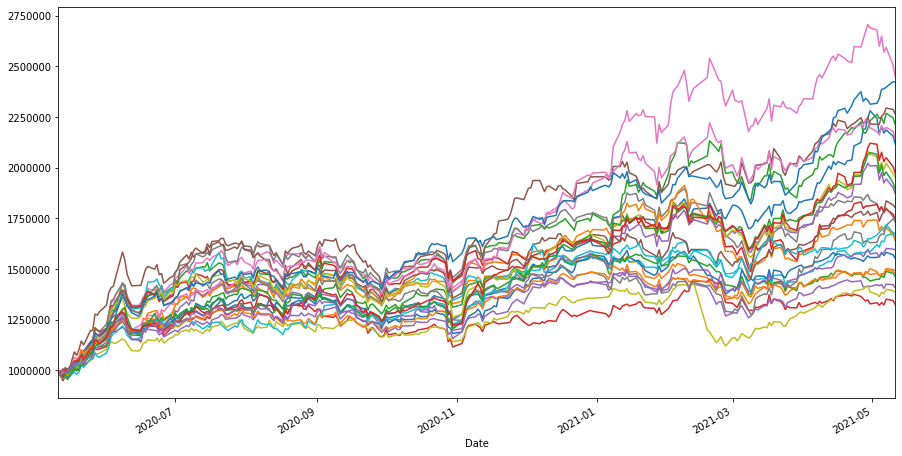

In [11]:
for x in np.arange(25):
    numero_de_acoes = 10
    carteira = random.choices(dados_yahoo.columns, k=numero_de_acoes)
    
    carteira = 100_000 * retorno_acumulado.loc[: , carteira]
    carteira['Saldo'] = carteira.sum(axis=1)
    carteira['Retorno'] = carteira['Saldo'].pct_change()
    carteira['Saldo'].plot(figsize=(15,8))
    

[*********************100%***********************]  1 of 1 completed


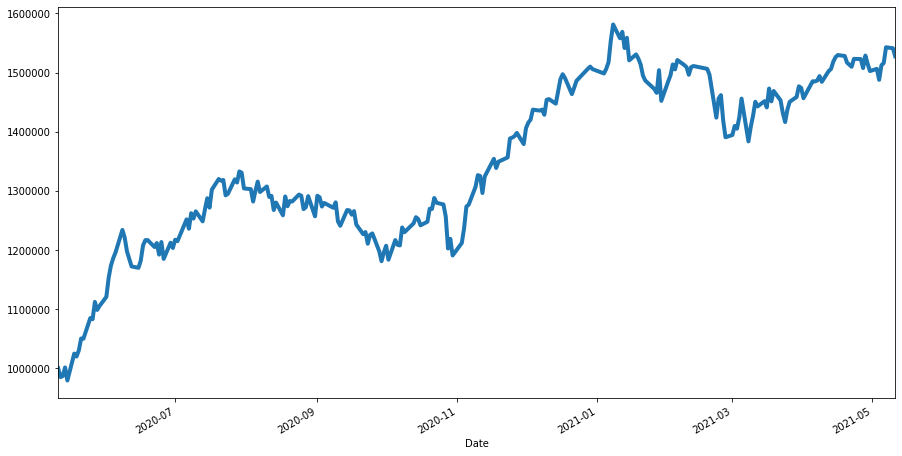

In [12]:
#pegando dados do ibov:
ibov = yf.download('BOVA11.SA', period='1y')['Adj Close']
ibov = ibov / ibov.iloc[0] # retorno do ibov
(ibov*1_000_000).plot(linewidth=4, figsize=(15,8)) #multiplicamos por 1 milhao devido ao fato de darmos 100 mil para as 10 ações do portfolio

# agora vamos juntar os ultimos dois blocos de código e simular 200 carteiras aleatórias vs ibov:

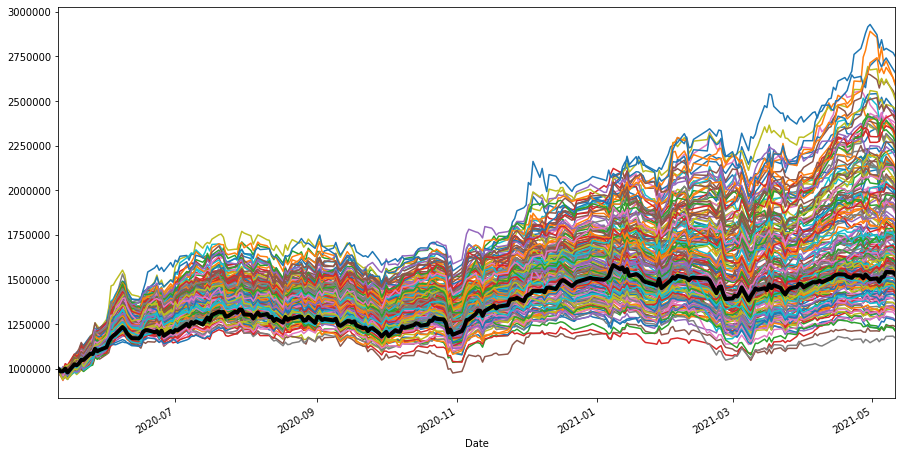

In [13]:
for x in np.arange(200):
    numero_de_acoes = 10
    carteira = random.choices(dados_yahoo.columns, k=numero_de_acoes)
    
    carteira = 100_000 * retorno_acumulado.loc[: , carteira]
    carteira['Saldo'] = carteira.sum(axis=1)
    carteira['Retorno'] = carteira['Saldo'].pct_change()
    carteira['Saldo'].plot(figsize=(15,8))

(ibov*1_000_000).plot(linewidth=4, figsize=(15,8), color='black')

# Como podemos ver acima, o gráfico do Ibov de preto e as carteiras hipotéticas com cores diversas.